In [1]:
# import all necesaary libraries
import numpy as np            
import pandas as pd           
import matplotlib.pyplot as plt 
import seaborn as sns           
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler      
from sklearn.linear_model import LogisticRegression   
from sklearn.ensemble import RandomForestClassifier   
from sklearn.metrics import (confusion_matrix, 
                             classification_report, 
                             accuracy_score, 
                             roc_auc_score,precision_recall_curve, auc,
roc_curve) 
from imblearn.over_sampling import SMOTE             
import warnings
warnings.filterwarnings('ignore')

In [2]:
# upload dataset and perform EDA
fraud_detection = pd.read_csv('/kaggle/input/datasets/organizations/mlg-ulb/creditcardfraud/creditcard.csv')
fraud_detection.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
fraud_detection.shape

(284807, 31)

In [4]:
print(fraud_detection.info())
print(fraud_detection.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

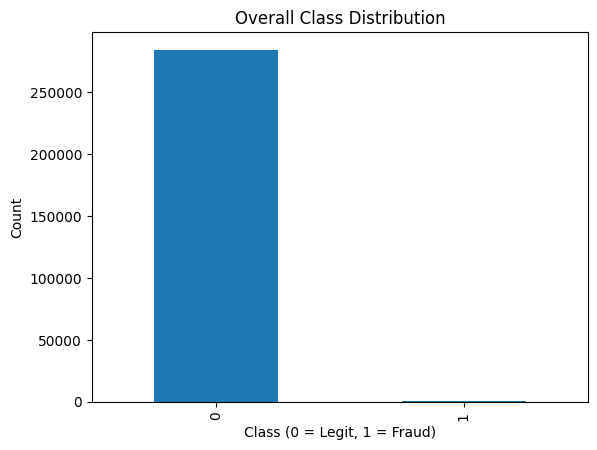

Class
0    284315
1       492
Name: count, dtype: int64
Class
0    0.998273
1    0.001727
Name: count, dtype: float64


In [5]:
# class distribution
class_counts = fraud_detection['Class'].value_counts()

plt.figure()
class_counts.plot(kind='bar')
plt.title("Overall Class Distribution")
plt.xlabel("Class (0 = Legit, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

print(class_counts)
print(class_counts / len(fraud_detection))


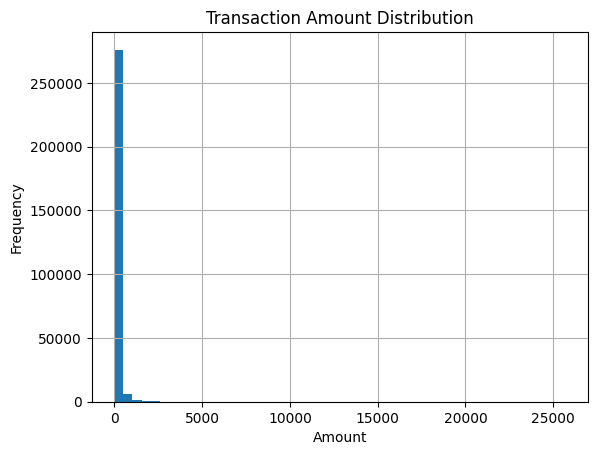

In [6]:
plt.figure()
fraud_detection['Amount'].hist(bins=50)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()


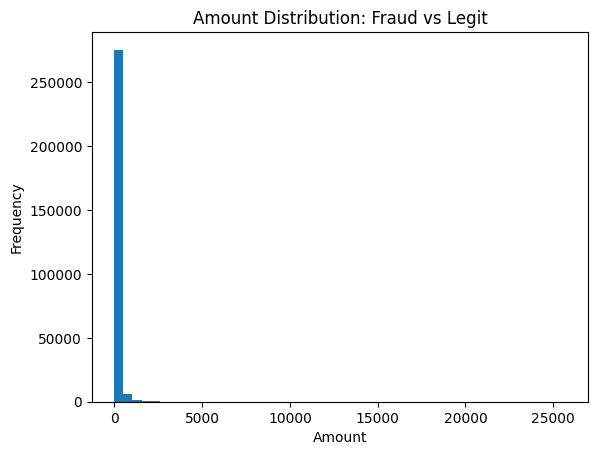

In [7]:
plt.figure()
plt.hist(fraud_detection[fraud_detection['Class'] == 0]['Amount'], bins=50)
plt.hist(fraud_detection[fraud_detection['Class'] == 1]['Amount'], bins=50)
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.title("Amount Distribution: Fraud vs Legit")
plt.show()


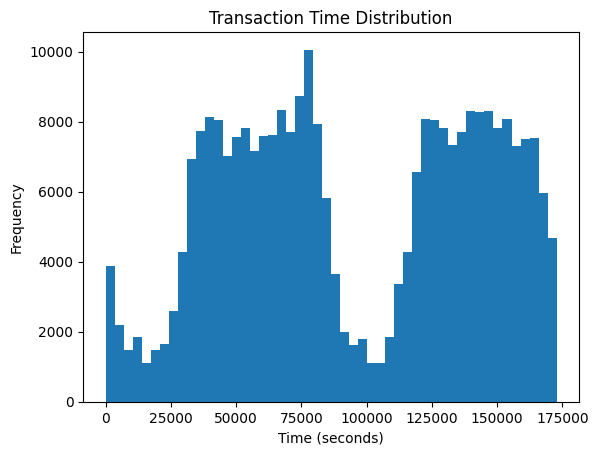

In [8]:
plt.figure()
plt.hist(fraud_detection['Time'], bins=50)
plt.title("Transaction Time Distribution")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency")
plt.show()


In [9]:
corr = fraud_detection.corr()['Class'].sort_values()

print(corr.head())
print(corr.tail())


V17   -0.326481
V14   -0.302544
V12   -0.260593
V10   -0.216883
V16   -0.196539
Name: Class, dtype: float64
V21      0.040413
V2       0.091289
V4       0.133447
V11      0.154876
Class    1.000000
Name: Class, dtype: float64


In [10]:
X = fraud_detection.drop("Class", axis=1)
y = fraud_detection["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [11]:
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(
    X_train, y_train
)


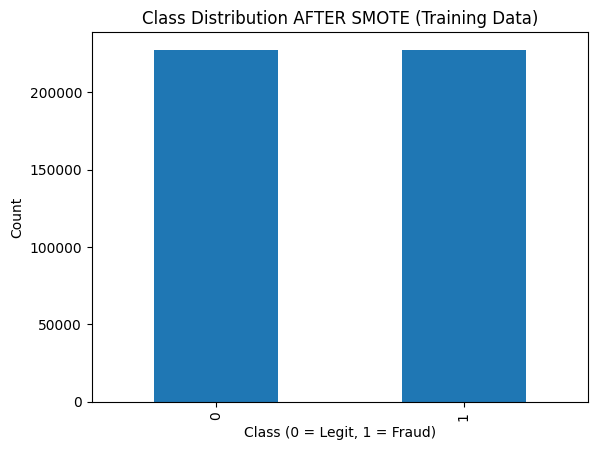

In [12]:
plt.figure()
pd.Series(y_train_smote).value_counts().plot(kind='bar')
plt.title("Class Distribution AFTER SMOTE (Training Data)")
plt.xlabel("Class (0 = Legit, 1 = Fraud)")
plt.ylabel("Count")
plt.show()


In [13]:
model = LogisticRegression(
    max_iter=1000,
    n_jobs=-1
)

model.fit(X_train_smote, y_train_smote)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, n_jobs=-1)

In [14]:
y_pred = model.predict(X_test)


In [15]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9883255503669113

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.12      0.90      0.21        98

    accuracy                           0.99     56962
   macro avg       0.56      0.94      0.60     56962
weighted avg       1.00      0.99      0.99     56962



In [16]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[56209   655]
 [   10    88]]


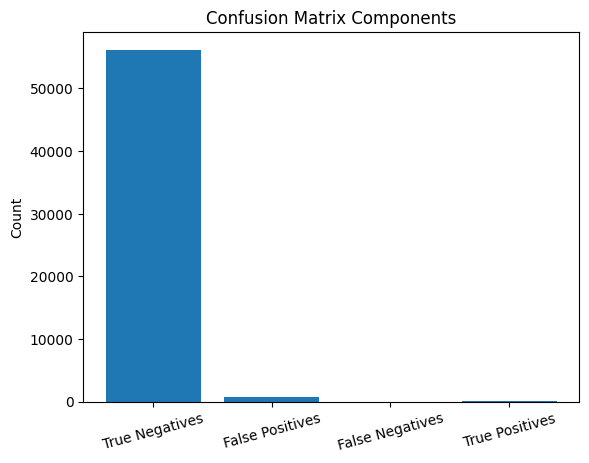

In [17]:
labels = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
values = [tn, fp, fn, tp]

plt.figure()
plt.bar(labels, values)
plt.title("Confusion Matrix Components")
plt.ylabel("Count")
plt.xticks(rotation=15)
plt.show()


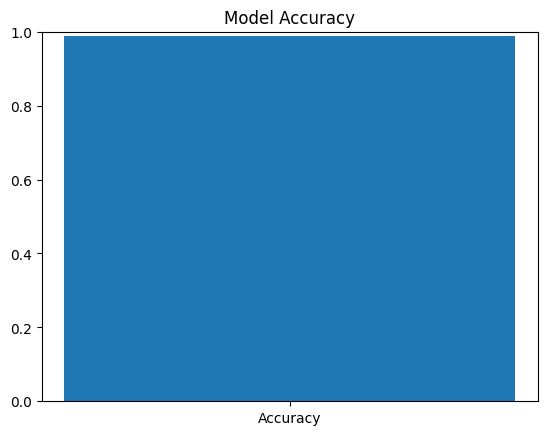

In [18]:
plt.figure()
plt.bar(['Accuracy'], [acc])
plt.ylim(0, 1)
plt.title("Model Accuracy")
plt.show()


In [19]:
y_prob = model.predict_proba(X_test)[:, 1]


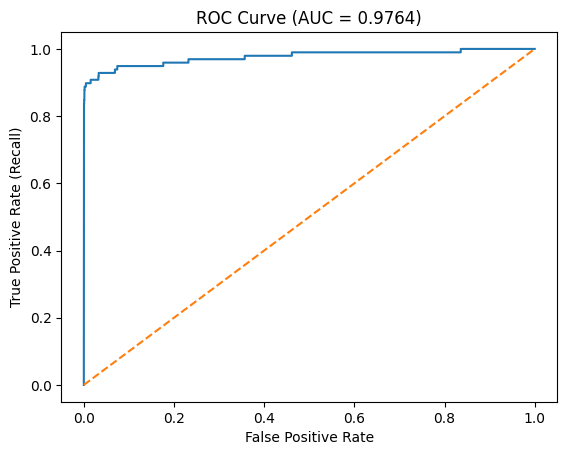

In [20]:

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title(f"ROC Curve (AUC = {roc_auc:.4f})")
plt.show()


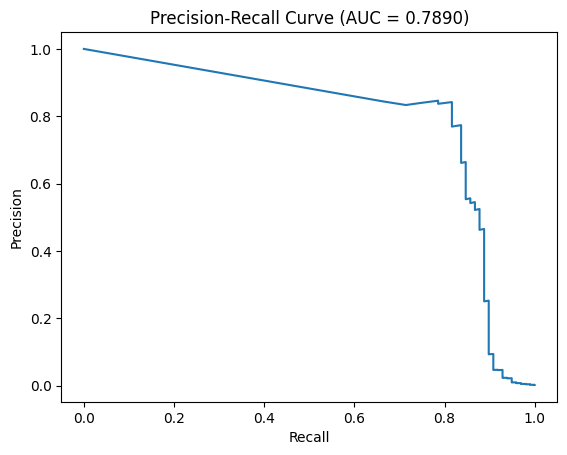

In [21]:

precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision-Recall Curve (AUC = {pr_auc:.4f})")
plt.show()
